## Installation and Setup

In [1]:
pip uninstall -y tensorflow protobuf

Found existing installation: tensorflow 2.18.0
Uninstalling tensorflow-2.18.0:
  Successfully uninstalled tensorflow-2.18.0
Found existing installation: protobuf 6.33.0
Uninstalling protobuf-6.33.0:
  Successfully uninstalled protobuf-6.33.0
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install -q tensorflow protobuf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.6/620.6 MB 3.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.2/323.2 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 56.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 68.1 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 113.8 MB/s eta 0:00:0000:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.12.0 requires google-cloud-bigquery-storage<3.0.0,>=2.30.0, which is not installed.
google-cloud-translate 3.12.1 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.19.5, but you have protobuf 6.33.1 which is incompatible.
ray 2.51.1 requires click!=8.3.0,>=7.0, but you have click 8.3.0 which is incompatible.
dopamine-rl 4.1.2 requires gymn

In [3]:
!pip install torch transformers[torch] datasets accelerate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 107.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 85.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 33.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 14.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 8.9 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.7/47.7 MB 41.6 MB/s eta 0:00:00:00:0100:01
  Attempting u

In [4]:
!pip install scikit-learn

In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import transformers
from datasets import Dataset
from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification, TrainingArguments, Trainer
import numpy as np
import torch
from sklearn.metrics import accuracy_score, f1_score, classification_report

In [6]:
pip install -q nltk textblob

Note: you may need to restart the kernel to use updated packages.


In [7]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
import warnings
warnings.filterwarnings('ignore')

In [8]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Preprocessing

In [9]:
class CommentPreprocessor:
    def __init__(self):
        # Class-specific keywords to preserve
        self.class_keywords = {
            'emotional': ['feel', 'emotional', 'heart', 'tears', 'cry', 'crying', 'sad', 'happy', 
                         'nostalgic', 'memory', 'memories', 'childhood', 'remember', 'tearful',
                         'touched', 'emotional', 'feelings', 'heartwarming', 'heartfelt'],
            
            'hate/abuse': ['hate', 'trash', 'garbage', 'awful', 'terrible', 'horrible', 'disgusting',
                          'stupid', 'idiot', 'dumb', 'worthless', 'useless', 'crap', 'suck', 'sucks',
                          'ridiculous', 'pathetic', 'hateful', 'offensive'],
            
            'threat': ['report', 'sue', 'legal', 'action', 'warning', 'stop', 'remove', 'delete',
                      'ban', 'blocked', 'consequences', 'police', 'lawyer', 'court', 'illegal',
                      'warning', 'threat', 'threatening', 'dangerous', 'harm'],
            
            'praise': ['amazing', 'excellent', 'wonderful', 'fantastic', 'brilliant', 'awesome',
                      'perfect', 'love', 'loved', 'great', 'best', 'superb', 'outstanding',
                      'impressive', 'incredible', 'phenomenal', 'marvelous', 'splendid'],
            
            'support': ['support', 'encouraging', 'encourage', 'keep going', 'proud', 'believe',
                       'faith', 'continue', 'stay strong', 'you can', 'motivation', 'motivational',
                       'inspiring', 'inspiration', 'cheer', 'cheering', 'rooting', 'fan'],
            
            'constructive criticism': ['improve', 'improvement', 'better', 'suggestion', 'advice',
                                      'feedback', 'constructive', 'criticism', 'could be', 'slightly',
                                      'maybe', 'perhaps', 'consider', 'suggest', 'recommend',
                                      'instead', 'alternative', 'option', 'way'],
            
            'spam': ['follow', 'subscribe', 'click', 'link', 'website', 'promotion', 'promo',
                    'discount', 'offer', 'free', 'buy', 'purchase', 'check out', 'visit',
                    'channel', 'page', 'profile', 'instagram', 'facebook', 'twitter'],
            
            'question/suggestion': ['how', 'what', 'when', 'where', 'why', 'can you', 'could you',
                                   'would you', 'question', 'ask', 'wonder', 'curious', 'suggest',
                                   'idea', 'proposal', 'request', 'please', '?', 'maybe try']
        }
        
        # Negation and intensity words (CRITICAL for sentiment)
        self.critical_words = {
            'negation': ['not', "n't", 'no', 'never', 'none', 'nothing', 'nobody', 'nowhere',
                        'neither', 'nor', 'cannot', "can't", "won't", "don't", "doesn't", "didn't",
                        "isn't", "aren't", "wasn't", "weren't", "haven't", "hasn't", "hadn't"],
            
            'intensity': ['very', 'really', 'extremely', 'absolutely', 'completely', 'totally',
                         'utterly', 'highly', 'incredibly', 'remarkably', 'exceptionally',
                         'particularly', 'especially', 'quite', 'rather', 'somewhat', 'slightly',
                         'barely', 'hardly', 'scarcely'],
            
            'emphasis': ['so', 'too', 'such', 'really', 'just', 'even', 'still', 'only', 'merely'],
        }
        
        # Combine all important words to preserve
        self.important_words = set()
        for word_list in self.critical_words.values():
            self.important_words.update(word_list)
        
    def clean_for_sentiment(self, text):
        """Specialized cleaning for sentiment/emotion detection"""
        if not isinstance(text, str):
            return ""
        
        # Store original for capitalization pattern detection
        original = text
        
        # Handle repeated letters for emphasis (sooooo good, nooooo)
        text = re.sub(r'([a-zA-Z])\1{3,}', r'\1\1', text)
        
        # Preserve ALL CAPS for emphasis (convert to special token)
        words = text.split()
        for i, word in enumerate(words):
            if word.isupper() and len(word) > 1:
                words[i] = f"EMPHASIS_{word.lower()}_EMPHASIS"
        text = ' '.join(words)
        
        # Lowercase everything except our emphasis tokens
        text = text.lower()
        text = text.replace('emphasis_', 'EMPHASIS_')
        
        # Expand contractions (CRITICAL for sentiment)
        contractions = {
            "can't": "cannot", "won't": "will not", "n't": " not",
            "'re": " are", "'s": " is", "'d": " would", "'ll": " will",
            "'ve": " have", "'m": " am", 
            "it's": "it is", "that's": "that is", "there's": "there is",
            "they're": "they are", "you're": "you are", "we're": "we are",
            "i'm": "i am", "what's": "what is", "who's": "who is",
            "where's": "where is", "when's": "when is", "why's": "why is",
            "how's": "how is"
        }
        
        for cont, exp in contractions.items():
            text = text.replace(cont, exp)
        
        # Remove URLs but mark them
        text = re.sub(r'http\S+|www\S+|https\S+', ' URL_TOKEN ', text)
        
        # Keep mentions/hashtags but standardize
        text = re.sub(r'@(\w+)', r'MENTION_\1', text)
        text = re.sub(r'#(\w+)', r'HASHTAG_\1', text)
        
        # Keep numbers (e.g., "I cried 5 times")
        text = re.sub(r'\b(\d+)\b', r'NUMBER_\1', text)
        
        # Remove special characters but keep: . , ! ? : ; ' " - ( ) [ ] { } ...
        # Keep punctuation for emotion detection
        text = re.sub(r'[^\w\s.,!?:;\'"\-()\[\]{}]', ' ', text)
        
        # Handle repeated punctuation (keep emotional punctuation)
        text = re.sub(r'([!]){3,}', r'EXCITED_PUNCT ', text)  # !!!
        text = re.sub(r'([?]){3,}', r'CONFUSED_PUNCT ', text)  # ???
        text = re.sub(r'\.{3,}', ' ELLIPSIS ', text)  # ...
        
        # Add class hint tokens based on keywords
        text = self.add_class_hints(text)
        
        # Clean extra spaces
        text = re.sub(r'\s+', ' ', text).strip()
        
        return text
    
    def add_class_hints(self, text):
        """Add class-specific hint tokens based on keywords"""
        words = text.lower().split()
        added_hints = set()
        
        for class_name, keywords in self.class_keywords.items():
            for keyword in keywords:
                if keyword in text.lower():
                    hint = f"CLASS_HINT_{class_name.upper().replace('/', '_')}"
                    if hint not in added_hints:
                        text = f"{text} {hint}"
                        added_hints.add(hint)
                    break  # Add hint only once per class
        
        return text
    
    def preprocess(self, text):
        """Main preprocessing pipeline"""
        return self.clean_for_sentiment(text)


## Load and Process data

In [10]:
df =  pd.read_csv("/kaggle/input/dataset/dataset.csv")

In [11]:
print(f"Dataset size: {len(df)}")
print(f"Columns: {df.columns.tolist()}")

Dataset size: 159
Columns: ['comment', 'label']


In [12]:
print(f"\nUnique labels: {df['label'].unique()}")
print(f"Label distribution:\n{df['label'].value_counts()}")


Unique labels: ['Praise' 'Support' 'Constructive Criticism' 'Hate/Abuse' 'Threat'
 'Emotional' 'Irrelevant/Spam' 'Question/Suggestion']
Label distribution:
label
Praise                    20
Constructive Criticism    20
Hate/Abuse                20
Threat                    20
Irrelevant/Spam           20
Emotional                 20
Question/Suggestion       20
Support                   19
Name: count, dtype: int64


In [13]:
df=df.sample(frac=1)
df = df.rename(columns={"comment": "text", "label": "labels"})


In [14]:
df.count()

text      159
labels    159
dtype: int64

In [15]:
df.columns

Index(['text', 'labels'], dtype='object')

In [16]:
df.head()

,text,labels
3,"This is so cool, very well done!",Praise
145,Can you extend the animation?,Question/Suggestion
5,Beautiful creation! Keep going!,Praise
88,I’ll make sure this gets removed.,Threat
140,Could you add subtitles next time?,Question/Suggestion


In [17]:

# ===== MAP LABELS TO YOUR 8 CLASSES =====
# Standardize label names
label_mapping = {
    'emotional': 'Emotional', 'Emotion': 'Emotional', 'emotion': 'Emotional',
    'feelings': 'Emotional', 'sentimental': 'Emotional',
    'hate/abuse': 'Hate/Abuse', 'hate': 'Hate/Abuse', 'abuse': 'Hate/Abuse',
    'offensive': 'Hate/Abuse', 'toxic': 'Hate/Abuse',
    'threat': 'Threat', 'threatening': 'Threat', 'warning': 'Threat',
    'praise': 'Praise', 'compliment': 'Praise', 'positive': 'Praise',
    'support': 'Support', 'encouragement': 'Support', 'motivational': 'Support',
    'constructive criticism': 'Constructive criticism', 
    'constructive': 'Constructive criticism',
    'criticism': 'Constructive criticism', 'feedback': 'Constructive criticism',
    'spam': 'Spam', 'irrelevant': 'Spam', 'promotional': 'Spam',
    'irrelevant/spam': 'Spam',
    'question/suggestion': 'Question/Suggestion', 'question': 'Question/Suggestion',
    'suggestion': 'Question/Suggestion', 'query': 'Question/Suggestion',
    'inquiry': 'Question/Suggestion',
}

# Apply mapping
df['labels'] = df['labels'].str.lower().map(lambda x: label_mapping.get(x, x))
df['labels'] = df['labels'].apply(lambda x: x.title() if isinstance(x, str) else x)

# Keep only your 8 classes
valid_classes = ['Emotional', 'Hate/Abuse', 'Threat', 'Praise', 'Support', 
                 'Constructive Criticism', 'Spam', 'Question/Suggestion']
df = df[df['labels'].isin(valid_classes)]

print(f"\nAfter cleaning - Label distribution:")



After cleaning - Label distribution:


In [18]:
print(df['labels'].value_counts())

labels
Praise                    20
Question/Suggestion       20
Threat                    20
Constructive Criticism    20
Hate/Abuse                20
Spam                      20
Emotional                 20
Support                   19
Name: count, dtype: int64


In [19]:
preprocessor = CommentPreprocessor()
print("\nPreprocessing comments...")
df['processed_text'] = df['text'].apply(preprocessor.preprocess)

# Show examples
print("\n=== Preprocessing Examples ===")
sample_idx = np.random.choice(len(df), 3, replace=False)
for idx in sample_idx:
    print(f"\nOriginal: {df.iloc[idx]['text'][:100]}...")
    print(f"Processed: {df.iloc[idx]['processed_text'][:150]}...")
    print(f"Label: {df.iloc[idx]['labels']}")
    print("-" * 80)


Preprocessing comments...

=== Preprocessing Examples ===

Original: Don't give up, you're talented!...
Processed: do not give up, you are talented!...
Label: Support
--------------------------------------------------------------------------------

Original: Tap my profile for surprises!...
Processed: tap my profile for surprises! CLASS_HINT_SPAM...
Label: Spam
--------------------------------------------------------------------------------

Original: Worst thing I’ve seen, pathetic work....
Processed: worst thing i ve seen, pathetic work. CLASS_HINT_HATE_ABUSE...
Label: Hate/Abuse
--------------------------------------------------------------------------------


## Encode Labels

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["label_id"] = le.fit_transform(df["labels"])

label2id = {label: i for i, label in enumerate(le.classes_)}
id2label = {i: label for label, i in label2id.items()}

df.head()
print(f"\nLabel encoding: {label2id}")



Label encoding: {'Constructive Criticism': 0, 'Emotional': 1, 'Hate/Abuse': 2, 'Praise': 3, 'Question/Suggestion': 4, 'Spam': 5, 'Support': 6, 'Threat': 7}


## Create dataset with stratified split

In [21]:
dataset = Dataset.from_pandas(df[["text", "label_id"]])
dataset = dataset.train_test_split(test_size=0.2, seed=42)
train_ds = dataset["train"]
test_ds = dataset["test"]

## Analyse data

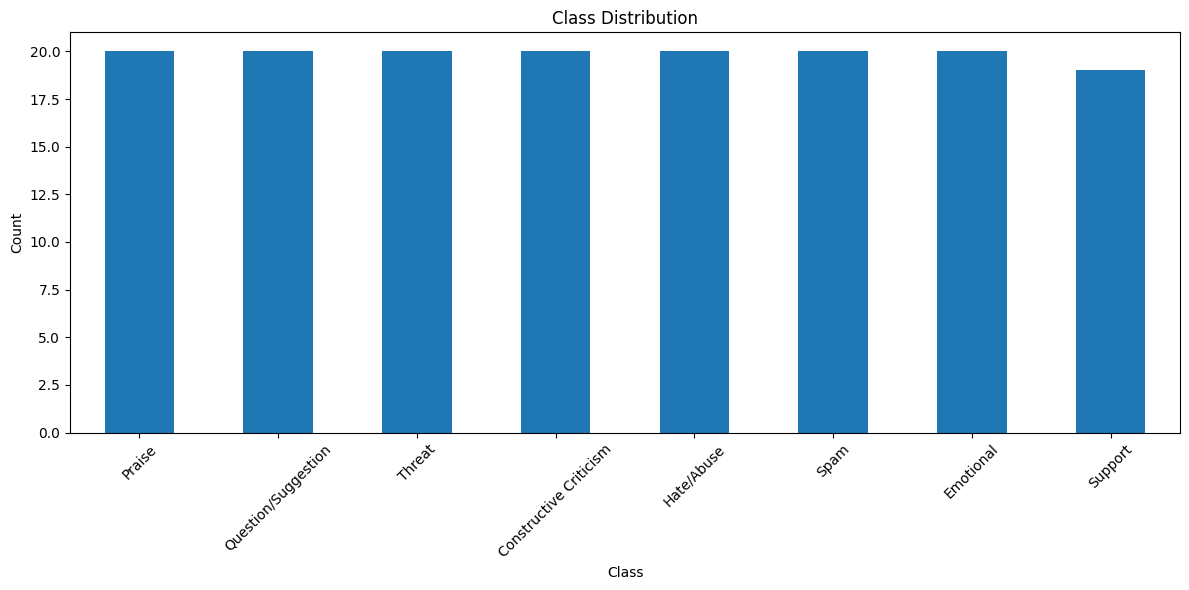

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
df['labels'].value_counts().plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [23]:
# Calculate class weights
from sklearn.utils.class_weight import compute_class_weight
import torch

class_weights = compute_class_weight(
    'balanced',
    classes=np.unique(df['label_id']),
    y=df['label_id']
)
class_weights = torch.tensor(class_weights, dtype=torch.float32)
print(f"\nClass weights: {dict(zip(le.classes_, class_weights.numpy()))}")



Class weights: {'Constructive Criticism': 0.99375, 'Emotional': 0.99375, 'Hate/Abuse': 0.99375, 'Praise': 0.99375, 'Question/Suggestion': 0.99375, 'Spam': 0.99375, 'Support': 1.0460526, 'Threat': 0.99375}


In [24]:
from sklearn.model_selection import train_test_split
from datasets import Dataset

train_df, test_df = train_test_split(
    df,
    test_size=0.2,
    random_state=42,
    stratify=df['label_id']
)

print(f"\nTrain size: {len(train_df)}")
print(f"Test size: {len(test_df)}")

# Create datasets
train_ds = Dataset.from_pandas(train_df[['processed_text', 'label_id']].rename(columns={'processed_text': 'text'}))
test_ds = Dataset.from_pandas(test_df[['processed_text', 'label_id']].rename(columns={'processed_text': 'text'}))


Train size: 127
Test size: 32


## Tokenization

In [25]:
tk = DistilBertTokenizerFast.from_pretrained("distilbert-base-uncased")

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

In [26]:
def tokenize_batch(batch):
    tokenized = tk(batch["text"], padding="max_length", truncation=True, max_length=256)
    tokenized["labels"] = batch["label_id"]
    return tokenized

In [27]:
train_ds = train_ds.map(tokenize_batch, batched=True)
test_ds  = test_ds.map(tokenize_batch, batched=True)

Map:   0%|          | 0/127 [00:00<?, ? examples/s]

Map:   0%|          | 0/32 [00:00<?, ? examples/s]

In [28]:
train_ds = train_ds.remove_columns(["text"])
test_ds  = test_ds.remove_columns(["text"])
train_ds.set_format("torch", columns=["input_ids", "attention_mask", "labels"])
test_ds.set_format("torch", columns=["input_ids", "attention_mask", "labels"])

In [29]:
print(train_ds[0])

{'input_ids': tensor([  101,  2061, 23069,  1012,   102,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0, 

In [30]:
num_labels = len(np.unique(df["label_id"]))

In [31]:
model = DistilBertForSequenceClassification.from_pretrained(
    "distilbert-base-uncased",
    num_labels=num_labels,
    id2label=id2label,
    label2id=label2id,
    dropout=0.2,
    attention_dropout=0.2
)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [32]:
from sklearn.metrics import accuracy_score, f1_score, classification_report

In [33]:
# def compute_metrics(eval_pred):
#     logits, labels = eval_pred
#     preds = np.argmax(logits, axis=1)
#     acc = accuracy_score(labels, preds)
#     f1 = f1_score(labels, preds, average="macro")
#     return {"accuracy": acc, "f1_macro": f1}

In [34]:
class WeightedTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False):
        labels = inputs.get("labels")
        outputs = model(**inputs)
        logits = outputs.logits
        
        # Weighted cross entropy loss
        loss_fct = torch.nn.CrossEntropyLoss(weight=class_weights.to(logits.device))
        loss = loss_fct(logits.view(-1, self.model.config.num_labels), 
                       labels.view(-1))
        
        return (loss, outputs) if return_outputs else loss

In [35]:
training_args = TrainingArguments(
    output_dir="./8class-comment-classifier",
    eval_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=30,
    weight_decay=0.01,
    logging_steps=20,
    load_best_model_at_end=True,
    metric_for_best_model="eval_f1_macro",
    greater_is_better=True,
    report_to="none",
    save_total_limit=2,
    warmup_steps=100,
    logging_dir='./logs',
    dataloader_num_workers=2,
    gradient_accumulation_steps=1,
    fp16=torch.cuda.is_available(),
)

In [36]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
import numpy as np

def compute_metrics(p):
    logits, labels = p
    preds = np.argmax(logits, axis=1)
    
    f1_macro = f1_score(labels, preds, average="macro")
    precision_macro = precision_score(labels, preds, average="macro")
    recall_macro = recall_score(labels, preds, average="macro")
    
    f1_weighted = f1_score(labels, preds, average="weighted")
    
    acc = accuracy_score(labels, preds)

    f1_per_class = f1_score(labels, preds, average=None)
    
    metrics = {
        "accuracy": acc,
        "f1_macro": f1_macro,
        "f1_weighted": f1_weighted,
        "precision_macro": precision_macro,
        "recall_macro": recall_macro,
    }

    for i, f1 in enumerate(f1_per_class):
        metrics[f"f1_{id2label[i].replace('/', '_')}"] = f1
    
    return metrics

In [37]:
from transformers import EarlyStoppingCallback

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_ds,
    eval_dataset=test_ds,
    compute_metrics=compute_metrics,
)

## Train

In [38]:
print("\n" + "="*50)
print("TRAINING FOR 8 CLASSES")
print("="*50)
print(f"Classes: {', '.join(valid_classes)}")

train_result = trainer.train()


TRAINING FOR 8 CLASSES
Classes: Emotional, Hate/Abuse, Threat, Praise, Support, Constructive Criticism, Spam, Question/Suggestion


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Epoch,Training Loss,Validation Loss,Accuracy,F1 Macro,F1 Weighted,Precision Macro,Recall Macro,F1 Constructive criticism,F1 Emotional,F1 Hate Abuse,F1 Praise,F1 Question Suggestion,F1 Spam,F1 Support,F1 Threat
1,No log,2.074091,0.218750,0.095029,0.095029,0.060714,0.218750,0.000000,0.000000,0.315789,0.000000,0.000000,0.000000,0.000000,0.444444
2,No log,2.072957,0.218750,0.093056,0.093056,0.059152,0.218750,0.000000,0.000000,0.300000,0.000000,0.000000,0.000000,0.000000,0.444444
3,No log,2.070776,0.218750,0.095029,0.095029,0.060714,0.218750,0.000000,0.000000,0.315789,0.000000,0.000000,0.000000,0.000000,0.444444
4,No log,2.067955,0.218750,0.094538,0.094538,0.060520,0.218750,0.000000,0.000000,0.285714,0.000000,0.000000,0.000000,0.000000,0.470588
5,2.082000,2.064333,0.281250,0.183333,0.183333,0.190104,0.281250,0.000000,0.000000,0.300000,0.000000,0.666667,0.000000,0.000000,0.500000
6,2.082000,2.059740,0.312500,0.189474,0.189474,0.145455,0.312500,0.000000,0.000000,0.315789,0.000000,0.666667,0.000000,0.000000,0.533333
7,2.082000,2.053786,0.312500,0.189474,0.189474,0.145455,0.312500,0.000000,0.000000,0.315789,0.000000,0.666667,0.000000,0.000000,0.533333
8,2.082000,2.045423,0.406250,0.310256,0.310256,0.353175,0.406250,0.000000,0.333333,0.333333,0.000000,0.800000,0.000000,0.400000,0.615385
9,2.082000,2.032413,0.437500,0.366270,0.366270,0.408333,0.437500,0.000000,0.444444,0.285714,0.000000,0.800000,0.333333,0.400000,0.666667
10,2.056700,2.011579,0.531250,0.440629,0.440629,0.408333,0.531250,0.000000,0.461538,0.285714,0.000000,0.666667,0.888889,0.333333,0.888889


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

## Evaluation

In [39]:
print("\n" + "="*50)
print("EVALUATION RESULTS")
print("="*50)

eval_results = trainer.evaluate()
for key, value in eval_results.items():
    if isinstance(value, float):
        print(f"{key}: {value:.4f}")

# Detailed classification report
predictions = trainer.predict(test_ds)
preds = np.argmax(predictions.predictions, axis=1)
labels = predictions.label_ids

print("\n" + "="*50)
print("DETAILED CLASSIFICATION REPORT")
print("="*50)

print(classification_report(
    labels,
    preds,
    target_names=[id2label[i] for i in sorted(id2label.keys())],
    digits=4
))


EVALUATION RESULTS


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


eval_loss: 0.6519
eval_accuracy: 0.9062
eval_f1_macro: 0.9016
eval_f1_weighted: 0.9016
eval_precision_macro: 0.9333
eval_recall_macro: 0.9062
eval_f1_Constructive Criticism: 1.0000
eval_f1_Emotional: 0.8000
eval_f1_Hate_Abuse: 0.6667
eval_f1_Praise: 0.8889
eval_f1_Question_Suggestion: 1.0000
eval_f1_Spam: 1.0000
eval_f1_Support: 0.8571
eval_f1_Threat: 1.0000
eval_runtime: 0.3162
eval_samples_per_second: 101.1870
eval_steps_per_second: 3.1620
epoch: 30.0000


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)



DETAILED CLASSIFICATION REPORT
                        precision    recall  f1-score   support

Constructive Criticism     1.0000    1.0000    1.0000         4
             Emotional     0.6667    1.0000    0.8000         4
            Hate/Abuse     1.0000    0.5000    0.6667         4
                Praise     0.8000    1.0000    0.8889         4
   Question/Suggestion     1.0000    1.0000    1.0000         4
                  Spam     1.0000    1.0000    1.0000         4
               Support     1.0000    0.7500    0.8571         4
                Threat     1.0000    1.0000    1.0000         4

              accuracy                         0.9062        32
             macro avg     0.9333    0.9062    0.9016        32
          weighted avg     0.9333    0.9062    0.9016        32



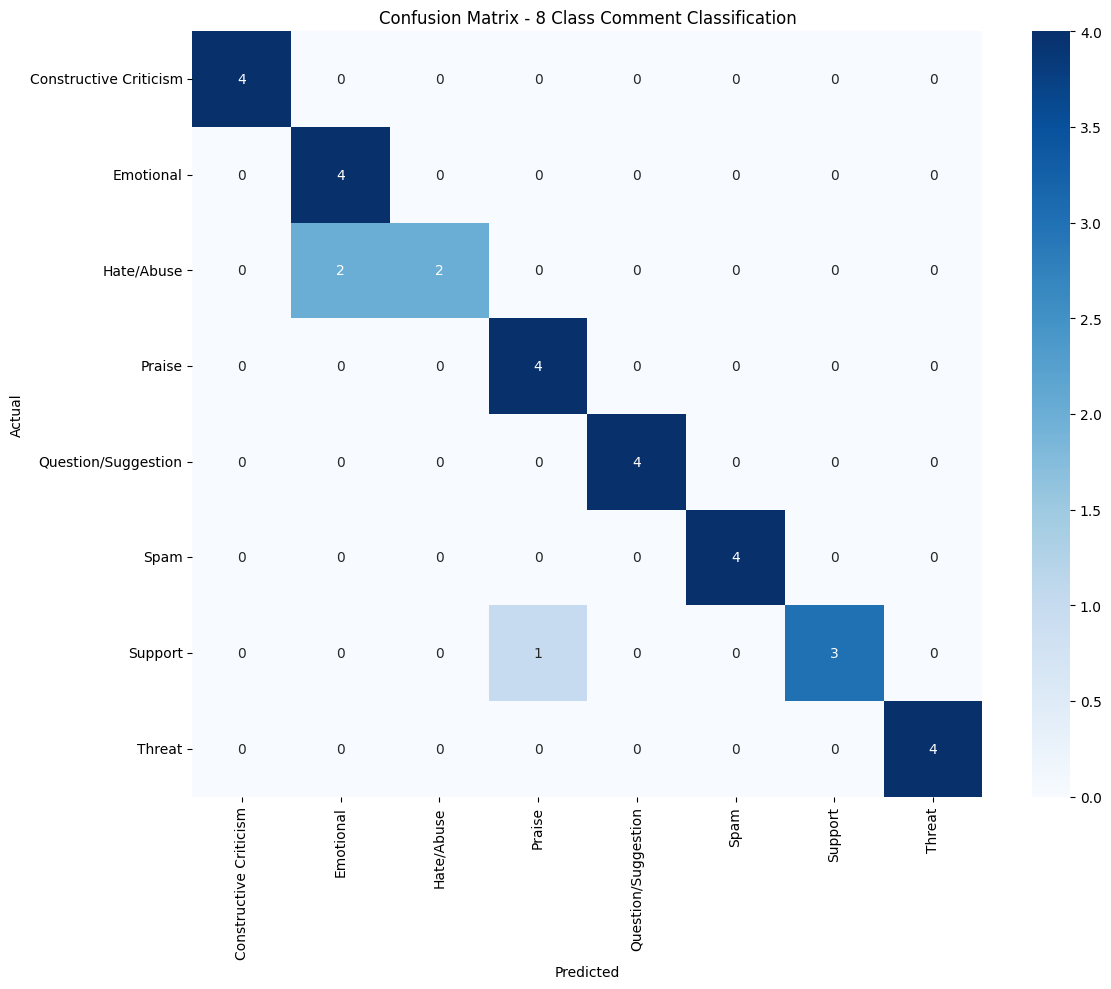

In [40]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(labels, preds)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=[id2label[i] for i in sorted(id2label.keys())],
            yticklabels=[id2label[i] for i in sorted(id2label.keys())])
plt.title('Confusion Matrix - 8 Class Comment Classification')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

In [41]:
import torch
import torch.nn.functional as F

device = model.device
print(f"Model is on device: {device}")

Model is on device: cuda:0


## Testing

In [42]:
print("\n" + "="*50)
print("TESTING ON SAMPLE COMMENTS (One per class)")
print("="*50)

test_comments_by_class = {
    'Emotional': "This video made me cry... it reminded me of my childhood memories.",
    'Hate/Abuse': "This is absolute trash! You should be ashamed of posting such garbage content.",
    'Threat': "If you don't remove this video immediately, I will report you to the authorities!",
    'Praise': "Absolutely amazing work! This is the best content I've seen all year!",
    'Support': "Keep going! We believe in you and support your journey. Don't give up!",
    'Constructive Criticism': "The animation is good but the audio quality could be improved. Maybe try a better microphone?",
    'Spam': "Check out my website for free followers! Click the link in bio!",
    'Question/Suggestion': "Could you make a tutorial on how you created this effect? I'd love to learn!"
}


TESTING ON SAMPLE COMMENTS (One per class)


In [43]:
for class_name, comment in test_comments_by_class.items():
    processed = preprocessor.preprocess(comment)
    inputs = tk(processed, return_tensors="pt", truncation=True, padding=True, max_length=256)

    inputs = {key: val.to(device) for key, val in inputs.items()}
    
    with torch.no_grad():
        outputs = model(**inputs)
        probs = F.softmax(outputs.logits, dim=-1)
        pred_idx = torch.argmax(probs, dim=1).item()
        confidence = probs[0][pred_idx].item()
        
        # Get top 3 predictions
        top3_probs, top3_idxs = torch.topk(probs[0], 3)
    
    predicted_class = id2label[pred_idx]
    print(f"\n{'='*60}")
    print(f"Input Class: {class_name}")
    print(f"Comment: {comment[:80]}...")
    print(f"Predicted: {predicted_class} ({confidence:.1%})")
    
    if predicted_class != class_name:
        print(f"❌ MISCLASSIFIED")
        print(f"Top 3 predictions:")
        for i in range(3):
            print(f"  {i+1}. {id2label[top3_idxs[i].item()]} ({top3_probs[i].item():.1%})")
    else:
        print(f"✅ CORRECT")
    print('-'*60)



Input Class: Emotional
Comment: This video made me cry... it reminded me of my childhood memories....
Predicted: Emotional (64.6%)
✅ CORRECT
------------------------------------------------------------

Input Class: Hate/Abuse
Comment: This is absolute trash! You should be ashamed of posting such garbage content....
Predicted: Hate/Abuse (64.0%)
✅ CORRECT
------------------------------------------------------------

Input Class: Threat
Comment: If you don't remove this video immediately, I will report you to the authorities...
Predicted: Threat (55.3%)
✅ CORRECT
------------------------------------------------------------

Input Class: Praise
Comment: Absolutely amazing work! This is the best content I've seen all year!...
Predicted: Praise (58.4%)
✅ CORRECT
------------------------------------------------------------

Input Class: Support
Comment: Keep going! We believe in you and support your journey. Don't give up!...
Predicted: Support (52.1%)
✅ CORRECT
---------------------------

## Saving 

In [44]:
print("\nSaving model...")
trainer.save_model("./8class_final_model")
tk.save_pretrained("./8class_final_model")



Saving model...


('./8class_final_model/tokenizer_config.json',
 './8class_final_model/special_tokens_map.json',
 './8class_final_model/vocab.txt',
 './8class_final_model/added_tokens.json',
 './8class_final_model/tokenizer.json')

In [45]:
import json
with open("./8class_final_model/config.json", "r") as f:
    config = json.load(f)
config["id2label"] = id2label
config["label2id"] = label2id
with open("./8class_final_model/config.json", "w") as f:
    json.dump(config, f, indent=2)

print("Model saved to ./8class_final_model/")

Model saved to ./8class_final_model/


In [46]:
# ===== CREATE RESPONSE TEMPLATES =====
print("\n" + "="*50)
print("RESPONSE TEMPLATES FOR EACH CLASS")
print("="*50)

response_templates = {
    'Emotional': "Thank you for sharing your feelings with us. We're touched that our content resonated with you emotionally. 💖",
    'Hate/Abuse': "We're sorry to hear you feel this way. We're committed to improving and value all constructive feedback.",
    'Threat': "This comment has been flagged for review. We take all concerns seriously and will investigate appropriately.",
    'Praise': "Thank you so much for your kind words! We're thrilled you enjoyed our work. 😊",
    'Support': "We truly appreciate your support and encouragement! It means the world to us. 🙏",
    'Constructive Criticism': "Thank you for your valuable feedback! We'll definitely consider your suggestions for improvement.",
    'Spam': "This comment appears to be promotional content unrelated to the discussion.",
    'Question/Suggestion': "Thanks for your question/suggestion! We'll look into this and get back to you soon."
}

for class_name, template in response_templates.items():
    print(f"\n{class_name}:")
    print(f"  {template}")

# Save response templates
with open("./8class_final_model/response_templates.json", "w") as f:
    json.dump(response_templates, f, indent=2)
print("\nResponse templates saved to ./8class_final_model/response_templates.json")


RESPONSE TEMPLATES FOR EACH CLASS

Emotional:
  Thank you for sharing your feelings with us. We're touched that our content resonated with you emotionally. 💖

Hate/Abuse:
  We're sorry to hear you feel this way. We're committed to improving and value all constructive feedback.

Threat:
  This comment has been flagged for review. We take all concerns seriously and will investigate appropriately.

Praise:
  Thank you so much for your kind words! We're thrilled you enjoyed our work. 😊

Support:
  We truly appreciate your support and encouragement! It means the world to us. 🙏

Constructive Criticism:
  Thank you for your valuable feedback! We'll definitely consider your suggestions for improvement.

Spam:
  This comment appears to be promotional content unrelated to the discussion.

Question/Suggestion:
  Thanks for your question/suggestion! We'll look into this and get back to you soon.

Response templates saved to ./8class_final_model/response_templates.json


In [47]:
# 5. Download files from Kaggle
from IPython.display import FileLink, display
import shutil

save_path = '/kaggle/working/8class_final_model'
# Create zip file
shutil.make_archive("/kaggle/working/model_files", 'zip', save_path)
display(FileLink("/kaggle/working/model_files.zip"))

/kaggle/working/model_files.zip